In [37]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [38]:
df=pd.read_csv("Land Mines.csv")
df

,V,H,S,M
0,0.338157,0.000000,1,1
1,0.320241,0.181818,1,1
2,0.287009,0.272727,1,1
3,0.256284,0.454545,1,1
4,0.262840,0.545455,1,1
...,...,...,...,...
333,0.323262,0.909091,3,5
334,0.444108,0.181818,6,5
335,0.353474,0.454545,6,5
336,0.362537,0.727273,6,5


In [39]:
df.head()

,V,H,S,M
0,0.338157,0.000000,1,1
1,0.320241,0.181818,1,1
2,0.287009,0.272727,1,1
3,0.256284,0.454545,1,1
4,0.262840,0.545455,1,1


In [40]:
df.tail()

,V,H,S,M
333,0.323262,0.909091,3,5
334,0.444108,0.181818,6,5
335,0.353474,0.454545,6,5
336,0.362537,0.727273,6,5
337,0.314199,1.000000,6,5


In [41]:
print(df.describe())

                V           H           S           M
count  338.000000  338.000000  338.000000  338.000000
mean     0.430634    0.508876    3.517751    2.952663
std      0.195819    0.306043    1.721218    1.419703
min      0.197734    0.000000    1.000000    1.000000
25%      0.309737    0.272727    2.000000    2.000000
50%      0.359516    0.545455    4.000000    3.000000
75%      0.482628    0.727273    5.000000    4.000000
max      0.999999    1.000000    6.000000    5.000000


In [42]:
df.isna().sum()

V    0
H    0
S    0
M    0
dtype: int64

In [43]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
df_i = pd.DataFrame(SimpleImputer(strategy="most_frequent").fit_transform(df))
for i in range(0,3):
    df_i[i] = LabelEncoder().fit_transform(df_i[i])
xtrain,xtest,ytrain,ytest = train_test_split(df_i.drop(columns=[0]), df_i[0], test_size =0.2)
print(xtrain.shape, xtest.shape)

(270, 3) (68, 3)


In [44]:
from sklearn.linear_model import LogisticRegression
model_dt=LogisticRegression()
model_dt.fit(xtrain,ytrain)

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [45]:
train_pred = model_dt.predict(xtrain)
from sklearn.metrics import accuracy_score
test_pred = model_dt.predict(xtest)
print("training accuracy is ", accuracy_score(train_pred,ytrain))
print("testing accuracy is ", accuracy_score(test_pred,ytest))

training accuracy is  0.11481481481481481
testing accuracy is  0.04411764705882353


In [46]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=3)

In [47]:
for i in range(2,10):
  model=KNeighborsClassifier(n_neighbors=i)
  model.fit(xtrain,ytrain)
  train_predict=model.predict(xtrain)
  test_predict=model.predict(xtest)
  print("k is ",i)
  print('training acuracy is ', accuracy_score(train_predict,ytrain))
  print('testing acuracy is ', accuracy_score(test_predict,ytest))

k is  2
training acuracy is  0.5925925925925926
testing acuracy is  0.0
k is  3
training acuracy is  0.34814814814814815
testing acuracy is  0.0
k is  4
training acuracy is  0.2518518518518518
testing acuracy is  0.0
k is  5
training acuracy is  0.21851851851851853
testing acuracy is  0.0
k is  6
training acuracy is  0.21851851851851853
testing acuracy is  0.014705882352941176
k is  7
training acuracy is  0.21481481481481482
testing acuracy is  0.014705882352941176
k is  8
training acuracy is  0.1925925925925926
testing acuracy is  0.014705882352941176
k is  9
training acuracy is  0.17777777777777778
testing acuracy is  0.014705882352941176


In [48]:
X = df.drop('M', axis=1)
y = df['M']

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('Train set:', X_train.shape)
print('Test set:', X_test.shape)

Train set: (270, 3)
Test set: (68, 3)


In [50]:
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [51]:
model = GaussianNB()
model.fit(X_train, y_train)
print('train score:', model.score(X_train, y_train))
print('test score:', model.score(X_test, y_test))

train score: 0.5
test score: 0.4411764705882353


In [52]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=1 , random_state=40)

model.fit(X_train, y_train)

print('train score:', model.score(X_train, y_train))
print('test score:', model.score(X_test, y_test))

train score: 0.7851851851851852
test score: 0.23529411764705882


In [53]:
from sklearn import svm
model = svm.SVC(kernel='linear', C=1.0, gamma='scale')
model.fit(X_train, y_train)

print('train score:', model.score(X_train, y_train))
print('test score:', model.score(X_test, y_test))

train score: 0.4111111111111111
test score: 0.3382352941176471


In [54]:
print(df.corr())

          V         H         S         M
V  1.000000 -0.377523  0.070673 -0.144569
H -0.377523  1.000000 -0.006957  0.041326
S  0.070673 -0.006957  1.000000  0.017346
M -0.144569  0.041326  0.017346  1.000000


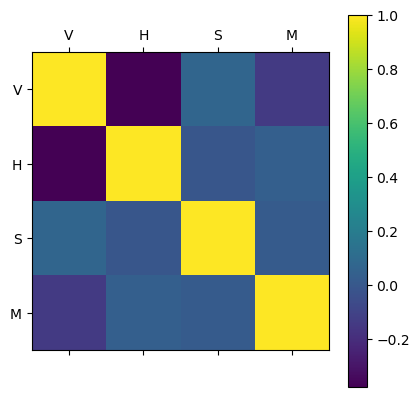

In [55]:
correlation_matrix = df.corr()
plt.matshow(correlation_matrix)
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.colorbar()
plt.show()

In [56]:
Yvar = 'M' 
aggtype = ['mean','std']

palette = 'flare'
seed = 49

test_size = 0.40

In [57]:
sns.color_palette(palette, 10)

[(0.92118373, 0.60184659, 0.45048789),
 (0.910403, 0.51342591, 0.39932342),
 (0.89260152, 0.42376366, 0.36526813),
 (0.85754536, 0.33574168, 0.36373567),
 (0.79876118, 0.27347974, 0.39064559),
 (0.71837612, 0.24102046, 0.41863486),
 (0.63329016, 0.21816454, 0.43555493),
 (0.54585987, 0.19467771, 0.44234111),
 (0.46073893, 0.17645017, 0.43417097),
 (0.37562649, 0.15974704, 0.41151182)]

In [58]:
df.head()
df.describe().T

,count,mean,std,min,25%,50%,75%,max
V,338.0,0.430634,0.195819,0.197734,0.309737,0.359516,0.482628,0.999999
H,338.0,0.508876,0.306043,0.000000,0.272727,0.545455,0.727273,1.000000
S,338.0,3.517751,1.721218,1.000000,2.000000,4.000000,5.000000,6.000000
M,338.0,2.952663,1.419703,1.000000,2.000000,3.000000,4.000000,5.000000


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338 entries, 0 to 337
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V       338 non-null    float64
 1   H       338 non-null    float64
 2   S       338 non-null    int64  
 3   M       338 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 10.7 KB


<Axes: >

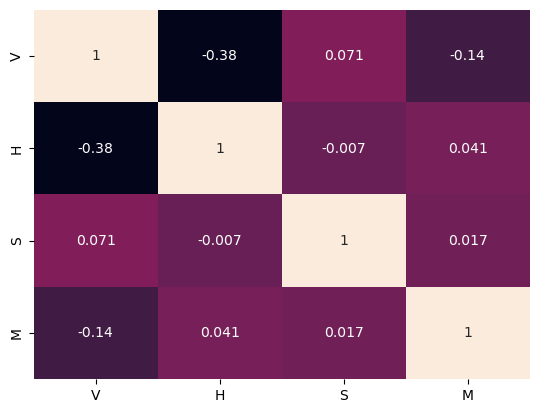

In [60]:
df.groupby(Yvar).agg(aggtype)
df.corr()
df.groupby(Yvar).corr()
sns.heatmap(df.corr(), cbar=False, annot=True)

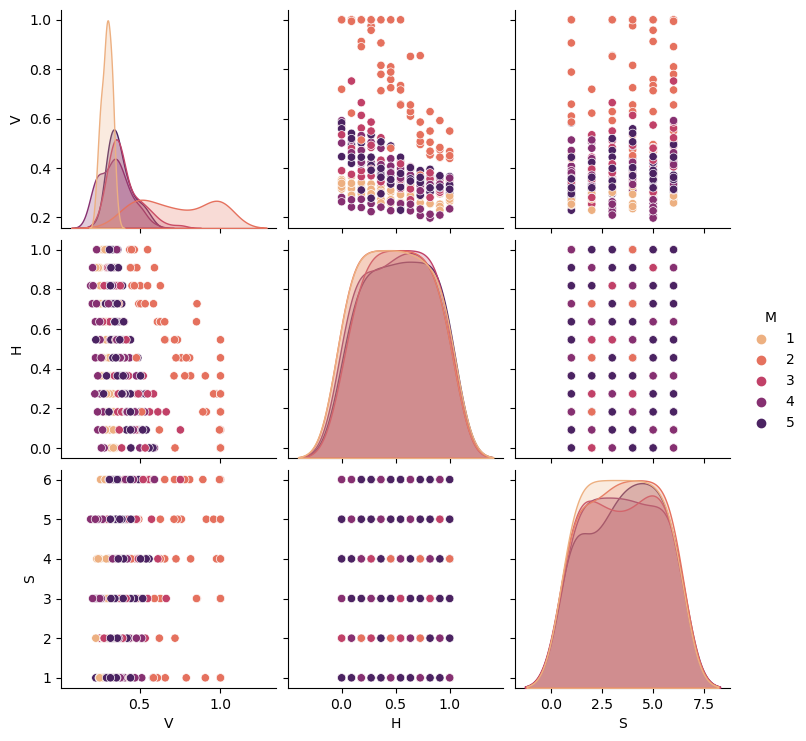

In [61]:
sns.pairplot(df, hue=Yvar, palette=palette)

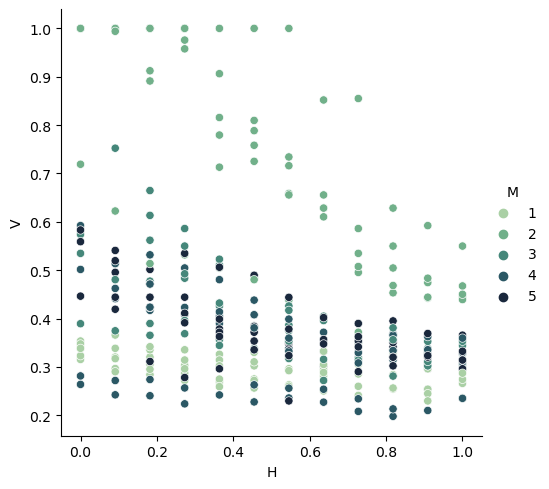

In [62]:
sns.relplot(x="H", y="V", hue="M", palette="ch:r=-.5,l=.75", data=df)

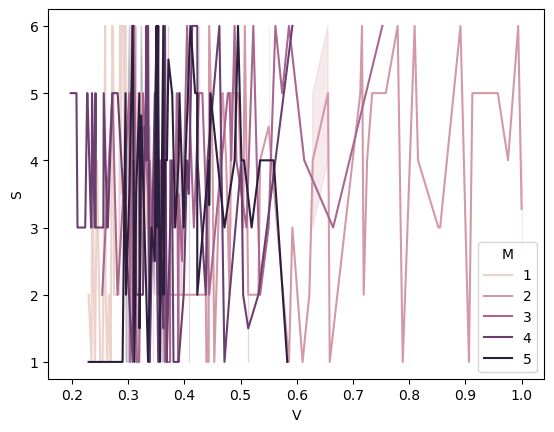

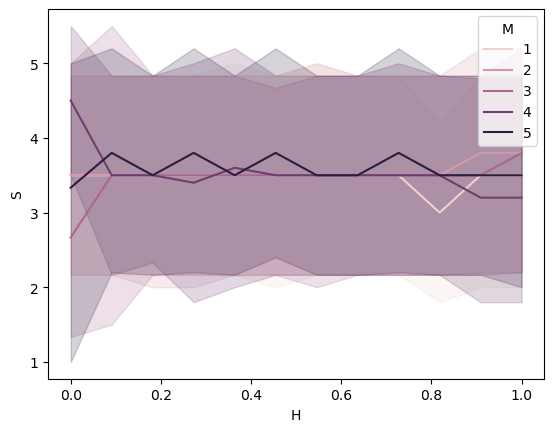

In [63]:
col = ['V', 'H']
for c in col:
    sns.lineplot(x=f"{c}", y="S",
             hue="M",
             data=df)
    plt.show()